In [1]:
import numpy as np
import scipy.stats as st
import math
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

In [82]:
def getS1(data, a):
    """
    Вычисляет выборочную дисперсию, при существующем математическом ожидании
    :param data: Выборка
    :param a: Математическое ожидание
    :return: Выборочную дисперсию
    """
    res = 0.0
    for elem in data:
        res += (elem - a) ** 2
    return res / len(data)


def getAWithSigma(data, sigma2, e):
    """
    Вычисляет доверительный интервал для математического ожидания при известной дисперсии
    :param data: Выборка
    :param sigma2: Дисперсия
    :param e: epsilon
    :return: Доверительный интервал для математического ожидания
    """
    x = np.mean(data)
    quantile = st.norm.ppf(1 - (e / 2))
    print(f't(1 - e / 2) = {quantile:0.3f}')
    n = len(data)
    sigma = sigma2 ** 0.5
    sqrN = n ** 0.5
    return round(x - (quantile * sigma / sqrN), 3), round(x + (quantile * sigma / sqrN), 3)


def getAWithoutSigma(data, e):
    """
    Вычисляет доверительный интервал для математического ожидания при неизвестной дисперсии
    :param data: Выборка
    :param e: epsilon
    :return: Доверительный интервал для математического ожидания
    """
    x = np.mean(data)
    n = len(data)
    S2 = np.var(data)
    S2_0 = n * S2 / (n - 1)
    S0 = S2_0 ** 0.5
    sqrN = n ** 0.5
    studentQuantile = st.t.ppf(1 - e / 2, n - 1)
    print(f'T(1 - e / 2, n - 1) = {studentQuantile:0.3f}')
    return round(x - (studentQuantile * S0 / sqrN), 3), round(x + (studentQuantile * S0 / sqrN), 3)


def getSigmaWithoutA(data, e):
    """
    Вычисляет доверительный интервал для дисперсии при неизвестном математическом ожидании
    :param data: Выборка
    :param e: epsilon
    :return: Доверительный интервал для дисперсии
    """
    S2 = np.var(data)
    n = len(data)
    XiQuantile1 = st.chi2.ppf(1 - e / 2, n - 1)
    XiQuantile2 = st.chi2.ppf(e / 2, n - 1)
    print(f'Xi(1 - e / 2, n - 1) = {XiQuantile1:0.3f}')
    print(f'Xi(e / 2, n - 1) = {XiQuantile2:0.3f}')
    return round(n * S2 / XiQuantile1, 3), round(n * S2 / XiQuantile2, 3)


def getSigmaWithA(data, a, e):
    """
    Вычисляет доверительный интервал для дисперсии при известном математическом ожидании
    :param data: Выборка
    :param a: Математическое ожидание
    :param e: epsilon
    :return: Доверительный интервал для дисперсии
    """
    S2_1 = getS1(data, a)
    n = len(data)
    XiQuantile1 = st.chi2.ppf(1 - e / 2, n)
    XiQuantile2 = st.chi2.ppf(e / 2, n)
    print(f'Xi(1 - e / 2, n - 1) = {XiQuantile1:0.3f}')
    print(f'Xi(e / 2, n - 1) = {XiQuantile2:0.3f}')
    return round(n * S2_1 / XiQuantile1, 3), round(n * S2_1 / XiQuantile2, 3)


def DICount(data, a, sigma2, e):
    n = len(data)
    print(f"N = {n}")
    print(f"X = {np.mean(data):0.3f}")
    print(f"S^2 = {np.var(data):0.3f}")
    print(f"S0^2 = {(np.var(data) * n / (n - 1)):0.3f}")
    print(f"S1^2 = {getS1(data, a):0.3f}")
    DIforAWithSigma = getAWithSigma(data, sigma2, e)
    print(f"ДИ для a если известна sigma^2: {DIforAWithSigma}")
    DIforAWithoutSigma = getAWithoutSigma(data, e)
    print(f"ДИ для a если sigma^2 неизвестна: {DIforAWithoutSigma}")
    DIforSigmaWithoutA = getSigmaWithoutA(data, e)
    print(f"ДИ для sigma^2 если а неизвестно: {DIforSigmaWithoutA}")
    DIforSigmaWithA = getSigmaWithA(data, a, e)
    print(f"ДИ для sigma^2 если а известно: {DIforSigmaWithA}")

In [83]:
print('----TASK1----')
print('Введите 1-ю числовую выборку')
data = list(map(float, input().split()))
if len(data) == 0:
    data = [-2.375, -0.886, -2.165, -2.212, -1.008, -1.289, -2.731, -1.333, -1.669, -0.353,
            -1.345, -1.565, -2.830, -1.141, -1.990, -2.908, -3.265, -2.734, -2.215, -2.301,
            -2.667, -2.988, -0.489, -2.499, -3.181, -2.210, -1.099, -2.276, -2.050, -0.707,
            -2.514, -1.328, -1.724, -2.763, -1.059, -2.410, -2.203, -0.114, -1.328, -1.540,
            -2.874, -1.637, -1.484, -2.088, -2.820, -2.128, -2.138, -1.604, -3.264, -1.281]
a = float(input('Математическое ожидание: ') or '-2')
sigma2 = float(input('Дисперсия: ') or '0.5')
e = float(input('Epsilon: ') or '0.01')
DICount(data, a, sigma2, e)

----TASK1----
Введите 1-ю числовую выборку

Математическое ожидание: 
Дисперсия: 
Epsilon: 
N = 50
X = -1.936
S^2 = 0.610
S0^2 = 0.622
S1^2 = 0.614
t(1 - e / 2) = 2.576
ДИ для a если известна sigma^2: (-2.193, -1.678)
T(1 - e / 2, n - 1) = 2.680
ДИ для a если sigma^2 неизвестна: (-2.235, -1.637)
Xi(1 - e / 2, n - 1) = 78.231
Xi(e / 2, n - 1) = 27.249
ДИ для sigma^2 если а неизвестно: (0.39, 1.118)
Xi(1 - e / 2, n - 1) = 79.490
Xi(e / 2, n - 1) = 27.991
ДИ для sigma^2 если а известно: (0.386, 1.096)


In [84]:
def fisherCriterion(data1, data2, e):
    """
    Критерий Фишера - проверяет гипотезу о равенстве двух выборок
    :param data1: Выборка X
    :param data2: Выборка Y
    :param e: epsilon
    :return: True, если верна основная гипотеза (о равенстве дисперсий двух выборок), False иначе
    """
    n = len(data1)
    m = len(data2)
    S0X = np.var(data1) * n / (n - 1)
    S0Y = np.var(data2) * m / (m - 1)
    print(f'S_0(X) = {S0X:0.3f}')
    print(f'S_0(Y) = {S0Y:0.3f}')
    d = S0X / S0Y if S0X > S0Y else S0Y / S0X
    f1 = st.f.ppf(e / 2, n - 1, m - 1)
    f2 = st.f.ppf(1 - e / 2, n - 1, m - 1)
    print(f'f(e/2) = {f1:0.3f}')
    print(f'f(1 - e/2) = {f2:0.3f}')
    print(f'd = {d:0.3f}')
    return f1 < d < f2


def studentCriterion(data1, data2, e):
    """
    Критерий Стьюдента - проверяет гипотезу о равенстве математических ожиданий двух выборок
    :param data1: Выборка X
    :param data2: Выборка Y
    :param e: epsilon
    :return: True, если верна основная гипотеза (о равенстве математических ожиданий двух выборок), False иначе
    """
    n = len(data1)
    m = len(data2)
    SX = np.var(data1)
    SY = np.var(data2)
    avgX = np.mean(data1)
    avgY = np.mean(data2)
    print(f'X = {avgX:0.3f}')
    print(f'Y = {avgY:0.3f}')
    numerator = (avgX - avgY) * ((m + n - 2) ** 0.5) * ((n * m) ** 0.5)
    denominator = ((n + m) ** 0.5) * ((n * SX + m * SY) ** 0.5)
    d = numerator / denominator
    t = st.t.ppf(1 - e / 2, n + m - 2)
    print(f't(1 - e /2) = {t:0.3f}')
    print(f'd = {d:0.3f}')
    return abs(d) < t

def crit(data1, data2, e):
    fCrit = fisherCriterion(data1, data2, e)
    print(f'По критерию Фишера дисперсии {"" if fCrit else "не"} совпадают')
    sCrit = studentCriterion(data1, data2, e)
    print(f'По критерию Стьюдента выборочные средние {"" if fCrit else "не"} совпадают')

In [85]:
print('----TASK2----')
crit(data[:20], data[20:], e)

----TASK2----
S_0(X) = 0.618
S_0(Y) = 0.645
f(e/2) = 0.310
f(1 - e/2) = 2.885
d = 1.044
По критерию Фишера дисперсии  совпадают
X = -1.916
Y = -1.949
t(1 - e /2) = 2.682
d = 0.144
По критерию Стьюдента выборочные средние  совпадают


In [86]:
def showHistAndECDF(data, supremumX, supremumY):
    '''
    Рисует график эмпирической функции распределения и гистограмму
    :param data: Выборка
    :param supremumX: - точка, в которой достигается супремум
    :param supremumY: - супремум разности функций
    :return: None
    '''
    ecdf = ECDF(data)
    plt.step(ecdf.x, ecdf.y)
    x = np.linspace(0, 1, 100)
    y = x
    plt.plot(x, y)
    plt.vlines(supremumX, supremumX, supremumX + supremumY, color = 'black')
    plt.show()
    plt.hist(data, bins=math.floor(math.log2(len(data)) + 1))
    plt.show()
    
def supremumForUniformData(data):
    """
    Вычисляет супремум между эмпирической и теоретической функциями распределения
    :param data: выборка из равномерного распределения
    :return: sup - супремум разности функций, point - точка, в которой он достигается
    """
    ecdf = ECDF(data)
    sup = float('-Inf')
    point = 0
    for i in range(len(data)):
        currentSub = math.fabs(ecdf.y[i + 1] - st.uniform.cdf(ecdf.x[i + 1]))
        if sup < currentSub:
            sup = currentSub + ecdf.y[i + 1] - ecdf.y[i]
            point = ecdf.x[i + 1]
    return sup, point

----TASK3----
Введите 2-ю числовую выборку

Supremum = 0.218 в точке 0.549


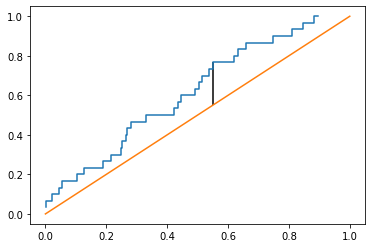

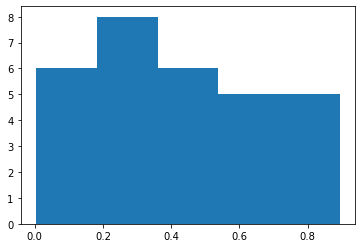

In [87]:
print('----TASK3----')
print('Введите 2-ю числовую выборку')
uniformData = list(map(float, input().split()))
if len(uniformData) == 0:
    uniformData = [0.190, 0.845, 0.882, 0.021, 0.435, 0.126, 0.056, 0.103, 0.810, 0.268,
                   0.332, 0.539, 0.282, 0.265, 0.247, 0.549, 0.446, 0.250, 0.044, 0.003,
                   0.618, 0.423, 0.506, 0.491, 0.895, 0.747, 0.632, 0.659, 0.514, 0.217]
sup, point = supremumForUniformData(uniformData)
print(f'Supremum = {sup:0.3f} в точке {point}')
showHistAndECDF(uniformData, point, sup)

In [88]:
def KolmagorovCrit(data, e, distribution):
    """
    Критерий Колмогорова - проверяет гипотезу, о принадлежности случайной величины распределению (distribution)
    :param distribution: Распределение
    :param data: Выборка
    :param e: epsilon
    :return: True, если верна основная гипотеза (о принадлежности случайной величины распределению), False иначе
    """
    stat, pvalue = st.kstest(data, distribution)
    d = (len(data) ** 0.5) * stat
    print(f"Статистика критерия Колмагорова (d) =  {d:0.3f}")
    print(f'РДУЗ = {pvalue:0.3f}')
    c = st.kstwobign.ppf(1 - e)
    print(f'c = {c}')
    return d < c


def PirsonCrit(data, e):
    """
    Критерий Пирсона (Хи - квадрат) - проверяет гипотезу, о принадлежности случайной величины
     теоритическому закону распределения
    :param data: Выборка
    :param e: epsilon
    :return: True, если верна основная гипотеза (о принадлежности случайной величины теоритическому закону распределения),
    False иначе
    """
    hist, bins = np.histogram(data, bins=math.floor(math.log2(len(data)) + 1))
    print(hist, bins)
    k = len(hist)
    n = len(data)
    d = 0.0
    for i in range(k):
        nP = n * (bins[i + 1] - bins[i])
        d += ((hist[i] - nP) ** 2) / nP
    print(f'Статистика критерия Пирсона (d) = {d:0.3f}')
    x = 1 - st.chi2.cdf(d, k - 1)
    print(f'РДУЗ = {x:0.3f}')
    c = st.chi2.ppf(1 - e, k - 1)
    print(f'c = {c:0.3f}')
    return d < c

def critForUniform(data, e):
    ktest = KolmagorovCrit(data, e, 'uniform')
    print(f'Критерий Колмагорова {"подтверждает" if ktest else "отвергает"} основную гипотезу')
    ptest = PirsonCrit(data, e)
    print(f'Критерий Пирсона {"подтверждает" if ptest else "отвергает"} основную гипотезу')

In [78]:
print('----TASK4----')
critForUniform(uniformData, e)

----TASK4----
Статистика критерия Колмагорова (d) =  1.010
РДУЗ = 0.230
c = 1.6276236115189502
Критерий Колмагорова подтверждает основную гипотезу
[6 8 6 5 5] [0.003  0.1814 0.3598 0.5382 0.7166 0.895 ]
Статистика критерия Пирсона (d) = 1.513
РДУЗ = 0.824
c = 13.277
Критерий Пирсона подтверждает основную гипотезу
